## 1. Implementacja algorytmów wyszukiwania wzorców:

### Algorytm naiwny

In [1]:
def naive_string_matching(text, pattern):
    results = []
    for s in range(0, len(text) - len(pattern) + 1):
        if text[s:s+len(pattern)] == pattern:
            results.append(s)

    return results

### Automat skończony

In [2]:
def transition_table(pattern):
    m = len(pattern)
    alphabet = set(pattern)
    result = [{} for _ in range(m + 1)]

    for q in range(0, m + 1):
        for a in alphabet:
            k = min(m, q + 1)
            while k != 0 and (pattern[:q] + a)[-k:] != pattern[:k]:
                k -= 1
            result[q][a] = k

    return result


def fa_string_matching(text, transition_tab):
    result = []

    q = 0
    m = len(transition_tab) - 1
    for i in range(0, len(text)):
        if text[i] in transition_tab[q]:
            q = transition_tab[q][text[i]]
            if q == m:
                result.append(i + 1 - q)
        else:
            q = 0

    return result

### Algorytm KMP

In [3]:
def prefix_function(pattern):
    pi = [0]
    k = 0
    for q in range(1, len(pattern)):
        while k > 0 and pattern[k] != pattern[q]:
            k = pi[k-1]
        if pattern[k] == pattern[q]:
            k = k + 1
        pi.append(k)

    return pi


def kmp_string_matching(text, pattern, pi):
    result = []

    q = 0
    for i in range(0, len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q-1]
        if pattern[q] == text[i]:
            q = q + 1
        if q == len(pattern):
            result.append(i + 1 - q)
            q = pi[q-1]

    return result

In [4]:
from time import time
import matplotlib.pyplot as plt

def time_function(fun):
    start = time()
    fun()
    end = time()
    return end - start

def pretty_print(t):
    if len(t) <= 12:
        return str(t)
    else:
        return "[" + "".join([str(x) + ", " for x in t[:12]]) + "(...)]"

## 2. Testy porównujące szybkość działania wyżej wymienionych algorytmów.

### Wzorzec 10 znaków, długość tekstu od 2'600'000 do 26'000'000 znaków

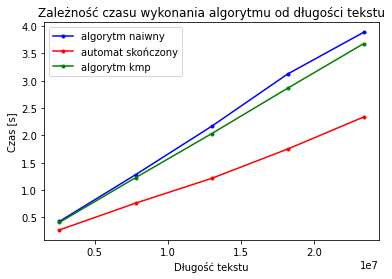

In [5]:
texts1 = ["qwertyuiopasdfghjklzxcvbnm" * x for x in range(100000, 1000001, 200000)]
pattern1 = "qwertyuiop"

results_naive = [time_function(lambda: naive_string_matching(x, pattern1)) for x in texts1]
results_fa = [time_function(lambda: fa_string_matching(x, transition_table(pattern1))) for x in texts1]
results_kmp = [time_function(lambda: kmp_string_matching(x, pattern1, prefix_function(pattern1))) for x in texts1]
plt.plot([len(x) for x in texts1], results_naive, marker='.', color='b', label='algorytm naiwny')
plt.plot([len(x) for x in texts1], results_fa, marker='.', color='r', label='automat skończony')
plt.plot([len(x) for x in texts1], results_kmp, marker='.', color='g', label='algorytm kmp')

plt.xlabel('Długość tekstu')
plt.ylabel('Czas [s]')
plt.legend(loc='upper left')
plt.title('Zależność czasu wykonania algorytmu od długości tekstu')
plt.show()

### Wzorzec od 50 do 400 znaków, długość tekstu 260'000 znaków


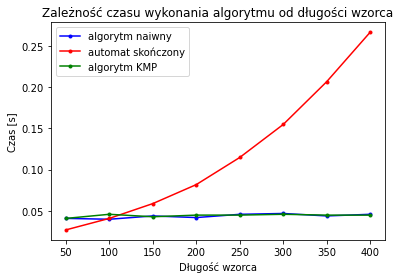

In [6]:
text2 = "qwertyuiopasdfghjklzxcvbnm" * 10000
patterns2 = ["qwertyuiop" * x for x in range(5, 41, 5)]

results_naive = [time_function(lambda: naive_string_matching(text2, x)) for x in patterns2]
results_fa = [time_function(lambda: fa_string_matching(text2, transition_table(x))) for x in patterns2]
results_kmp = [time_function(lambda: kmp_string_matching(text2, x, prefix_function(x))) for x in patterns2]
plt.plot([len(x) for x in patterns2], results_naive, marker='.', color='b', label='algorytm naiwny')
plt.plot([len(x) for x in patterns2], results_fa, marker='.', color='r', label='automat skończony')
plt.plot([len(x) for x in patterns2], results_kmp, marker='.', color='g', label='algorytm KMP')

plt.xlabel('Długość wzorca')
plt.ylabel('Czas [s]')
plt.legend(loc='upper left')
plt.title('Zależność czasu wykonania algorytmu od długości wzorca')
plt.show()

Wnioski:
 - W pierwszym teście przy stałej długości wzorca, zgodnie z teorią, czas wykonania wszystkich algorytmów rośnie liniowo
 - Dla krótkiego wzorca długości rzędu 10, algorytm automatu skończonego w Pythonowej implementacji jest około 2 razy szybszy od pozostałych
 - W 2 teście, przy zwiększającej się długości wzorca, dobrze widać dominującą złożoność obliczania funkcji przejścia w algorytmie automatu skończonego

## 3. Znajdź wszystkie wystąpienia wzorca "art" w załączonej ustawie, za pomocą każdego algorytmu.

In [7]:
with open("1997_714.txt", encoding="utf-8") as f:
    txt1 = f.read()
    p1 = "art"

    res1 = naive_string_matching(txt1, p1)
    print(f"Algorytm naiwny:\n  Poprawne przesunięcia: {pretty_print(res1)}\n  Liczba dopasowań: {len(res1)}\n")

    res2 = fa_string_matching(txt1, transition_table(p1))
    print(f"Automat skończony:\n  Poprawne przesunięcia: {pretty_print(res2)}\n  Liczba dopasowań: {len(res2)}\n")

    res3 = kmp_string_matching(txt1, p1, prefix_function(p1))
    print(f"Algorytm KMP:\n  Poprawne przesunięcia: {pretty_print(res2)}\n  Liczba dopasowań: {len(res2)}\n")

Algorytm naiwny:
  Poprawne przesunięcia: [1156, 1505, 4692, 4734, 4879, 5082, 5148, 5949, 6039, 7266, 7511, 7781, (...)]
  Liczba dopasowań: 273

Automat skończony:
  Poprawne przesunięcia: [1156, 1505, 4692, 4734, 4879, 5082, 5148, 5949, 6039, 7266, 7511, 7781, (...)]
  Liczba dopasowań: 273

Algorytm KMP:
  Poprawne przesunięcia: [1156, 1505, 4692, 4734, 4879, 5082, 5148, 5949, 6039, 7266, 7511, 7781, (...)]
  Liczba dopasowań: 273



## 4. Porównanie szybkości działania algorytmów dla problemu z p. 3.

In [8]:
with open("1997_714.txt", encoding="utf-8") as f:
    txt1 = f.read()
    p1 = "art"

    print(f'Algorytm naiwny: {round(time_function(lambda: naive_string_matching(txt1, p1)), 4)} sek.')
    print(f'Automat skończony: {round(time_function(lambda: fa_string_matching(txt1, transition_table(p1))), 4)} sek.')
    print(f'Algorytm KMP: {round(time_function(lambda: kmp_string_matching(txt1, p1, prefix_function(p1))), 4)} sek.')

Algorytm naiwny: 0.0389 sek.
Automat skończony: 0.019 sek.
Algorytm KMP: 0.0332 sek.


## 5. Porównanie szybkości działania algorytmów poprzez wyszukanie słowa "Ukraina" we fragmencie polskiej Wikipedii

In [9]:
with open("passages-head.tsv", encoding="utf-8") as f:
    txt2 = f.read()
    p2 = "Ukraina"

    print(f'Algorytm naiwny: {round(time_function(lambda: naive_string_matching(txt2, p2)), 4)} sek.')
    print(f'Automat skończony: {round(time_function(lambda: fa_string_matching(txt2, transition_table(p2))), 4)} sek.')
    print(f'Algorytm KMP: {round(time_function(lambda: kmp_string_matching(txt2, p2, prefix_function(p2))), 4)} sek.')

Algorytm naiwny: 13.6704 sek.
Automat skończony: 7.4989 sek.
Algorytm KMP: 12.0936 sek.


W powyższych testach praktycznych widać, że przy krótkich wzorcach i długich tekstach najlepiej radzi sobie algorytm automatu skończonego. Jest on około 2 razy szybszy.

## 6. Propozycja tekstu i wzorca, dla którego zmierzony czas działania algorytmów 2 oraz 3 (uwzględniający tylko dopasowanie, bez pre-processingu) będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego.

In [10]:
txt3 = "a" * 240000
p3 = "a" * 120000

# pre-processing
transition_tab = transition_table(p3)
prefix_fun = prefix_function(p3)

t1 = round(time_function(lambda: naive_string_matching(txt3, p3)), 4)
t2 = round(time_function(lambda: fa_string_matching(txt3, transition_tab)), 4)
t3 = round(time_function(lambda: kmp_string_matching(txt3, p3, prefix_fun)), 4)

print(f'Algorytm naiwny: {t1} sek.\nAutomat skończony: {t2} sek.\nAlgorytm KMP: {t3} sek.\n')
print(f'Automat skończony {round(t1/t2, 2)} razy krótszy niż naiwny')
print(f'KMP {round(t1/t3, 2)} razy krótszy niż naiwny')

Algorytm naiwny: 1.0043 sek.
Automat skończony: 0.0409 sek.
Algorytm KMP: 0.0708 sek.

Automat skończony 24.56 razy krótszy niż naiwny
KMP 14.19 razy krótszy niż naiwny


Dla algorytmu naiwnego najgorszy przypadek zachodzi, gdy długość wzorca jest rzędu długości tekstu.

## 7. Propozycja wzorca, dla którego zmierzony czas obliczenia tablicy przejścia automatu skończonego będzie co najmniej 5-krotnie dłuższy, niż czas potrzebny na utworzenie funkcji przejścia w algorytmie KMP.

In [11]:
p4 = "aab" * 1500

t1 = round(time_function(lambda: transition_table(p4)), 4)
t2 = round(time_function(lambda: prefix_function(p4)), 6)

print(f'Obliczenie tablicy przejścia dla automatu skończonego: {t1} sek.')
print(f'Utworzenie funkcji przejścia w algorytmie KMP: {t2} sek.')

print(f"Obliczanie tablicy przejścia {round(t1/t2, 2)} razy krótsze niż funkcji przejścia algorytmu KMP")

Obliczenie tablicy przejścia dla automatu skończonego: 7.7143 sek.
Utworzenie funkcji przejścia w algorytmie KMP: 0.000997 sek.
Obliczanie tablicy przejścia 7737.51 razy krótsze niż funkcji przejścia algorytmu KMP
